In [2]:
import src_nna.optimal_approx.algorithm_1 as alg1
# import algorithm_1 as alg1
import src_nna.optimal_approx.Imamototang_alg as imamototang
# import Imamototang_alg as imamototang

In [3]:
import pandas as pd
import numpy as np
import time
import sympy as sp
import matplotlib.pyplot as plt
import warnings

In [4]:
warnings.filterwarnings('ignore')


In [5]:
table_1 = []

# function map
functions = {
    "e(x)": {"domain": [0, 1], "f": alg1.exp, "f'": alg1.exp},
    "x**2": {"domain": [-1, 1], "f": alg1.x_sq, "f'": lambda x: 2 * x},
    "x**3": {"domain": [0, 1], "f": alg1.x_cube, "f'": lambda x: 3 * (x**2)},
}

n_segments = [2, 3, 5, 10]
x_sym = sp.Symbol("x")

In [6]:
table_1 = []
predictions_alg1 = []
predictions_imamototang = []

for fn in functions:
    target_fn = functions[fn]["f"]
    a = functions[fn]["domain"][0]
    b = functions[fn]["domain"][1]
    f_prime = functions[fn]["f'"]

    domain_points = np.linspace(a, b, 1000)
    actual_values = target_fn(domain_points)

    for n in n_segments:
        # print(functions[fn])

        start_time_alg1 = time.time()
        g_alg1, optimal_approx_errors = alg1.optimal_approximation_algorithm(
            target_fn, a, b, n
        )
        total_time_alg1 = round(time.time() - start_time_alg1, 3)
        lower_bound, upper_bound = alg1.calculate_bounds(target_fn, a, b, n)
        mean_approx_error = round(np.mean(optimal_approx_errors), 5)

        start_time_imamototang = time.time()
        g_imamototang, epsilons = imamototang.immamoto_optimal_approximation(
            target_fn, f_prime, a, b, n
        )
        total_time_imamototang = round(time.time() - start_time_imamototang, 3)
        mean_epsilons = round(np.mean(epsilons), 5)

        pred_values_alg1 = [g_alg1.subs(x_sym, v) for v in domain_points]
        predictions_alg1.append({
            "Function": fn,
            "n": n,
            "Domain": domain_points,
            "Actual": actual_values,
            "Predicted_alg1": pred_values_alg1,
        })

        pred_values_imamototang = [g_imamototang(v) for v in domain_points]
        predictions_imamototang.append({
            "Function": fn,
            "n": n,
            "Domain": domain_points,
            "Actual": actual_values,
            "Predicted_imamototang": pred_values_imamototang,
        })

        record = {
            "Function": fn,
            "n": n,
            "Mean ΔS": mean_approx_error,
            "Theoretical Upper Bound": upper_bound,
            "Theoretical Lower Bound": lower_bound,
            "Time (Alg1) [s]": total_time_alg1,
            "Mean \u03B5": mean_epsilons,
            "Time (Imamototang) [s]": total_time_imamototang,
        }
        table_1.append(record)

In [9]:
table_1_df = pd.DataFrame(table_1)
table_1_df.to_csv("table_1.csv", index=False)
table_1_df

,Function,n,Mean ΔS,Theoretical Upper Bound,Theoretical Lower Bound,Time (Alg1) [s],Mean ε,Time (Imamototang) [s]
0,e(x),2,0.02635,0.0425,0.0156,0.066,0.05270,0.000
1,e(x),3,0.01170,0.0189,0.0069,0.050,0.02340,0.000
2,e(x),5,0.00421,0.0068,0.0025,0.180,0.00842,0.016
3,e(x),10,0.00107,0.0017,0.0006,0.612,0.00210,0.070
4,x**2,2,0.12500,0.1250,0.1250,0.067,0.25000,0.000
5,x**2,3,0.05556,0.0556,0.0556,0.047,0.11111,0.000
6,x**2,5,0.02000,0.0200,0.0200,0.167,0.04000,2.096
7,x**2,10,0.00500,0.0050,0.0050,0.417,0.01000,0.053
8,x**3,2,0.04486,0.0938,0.0000,0.050,0.08973,0.000
9,x**3,3,0.01946,0.0417,0.0000,0.133,0.03892,0.000


In [11]:
table_1_df['paper_rmse'] = [0.02635, 0.01170, 0.00421, 0.00105, 0.125, 0.05556, 0.02000, 0.00500, 0.04486, 0.01946, 0.00687, 0.00169]
table_1_df.to_csv("table_1.csv", index=False)


In [25]:
df = pd.read_csv("table_1.csv")
df

,Function,n,Mean ΔS,Theoretical Upper Bound,Theoretical Lower Bound,Time (Alg1) [s],Mean ε,Time (Imamototang) [s],paper_rmse,ammamoto_rmse,ammamoto_paper_rmse
0,e(x),2,0.02635,0.0425,0.0156,0.066,0.05270,0.000,0.02635,0.01800,0.0233
1,e(x),3,0.01170,0.0189,0.0069,0.050,0.02340,0.000,0.01170,0.00800,0.01074
2,e(x),5,0.00421,0.0068,0.0025,0.180,0.00842,0.016,0.00421,0.00288,0.00399
3,e(x),10,0.00107,0.0017,0.0006,0.612,0.00210,0.070,0.00105,0.00072,0.00102
4,x**2,2,0.12500,0.1250,0.1250,0.067,0.25000,0.000,0.12500,0.08544,0.125
5,x**2,3,0.05556,0.0556,0.0556,0.047,0.11111,0.000,0.05556,0.03798,0.05556
6,x**2,5,0.02000,0.0200,0.0200,0.167,0.04000,2.096,0.02000,0.01367,0.02
7,x**2,10,0.00500,0.0050,0.0050,0.417,0.01000,0.053,0.00500,0.00342,0.005
8,x**3,2,0.04486,0.0938,0.0000,0.050,0.08973,0.000,0.04486,0.03050,0.0349
9,x**3,3,0.01946,0.0417,0.0000,0.133,0.03892,0.000,0.01946,0.01325,0.01644


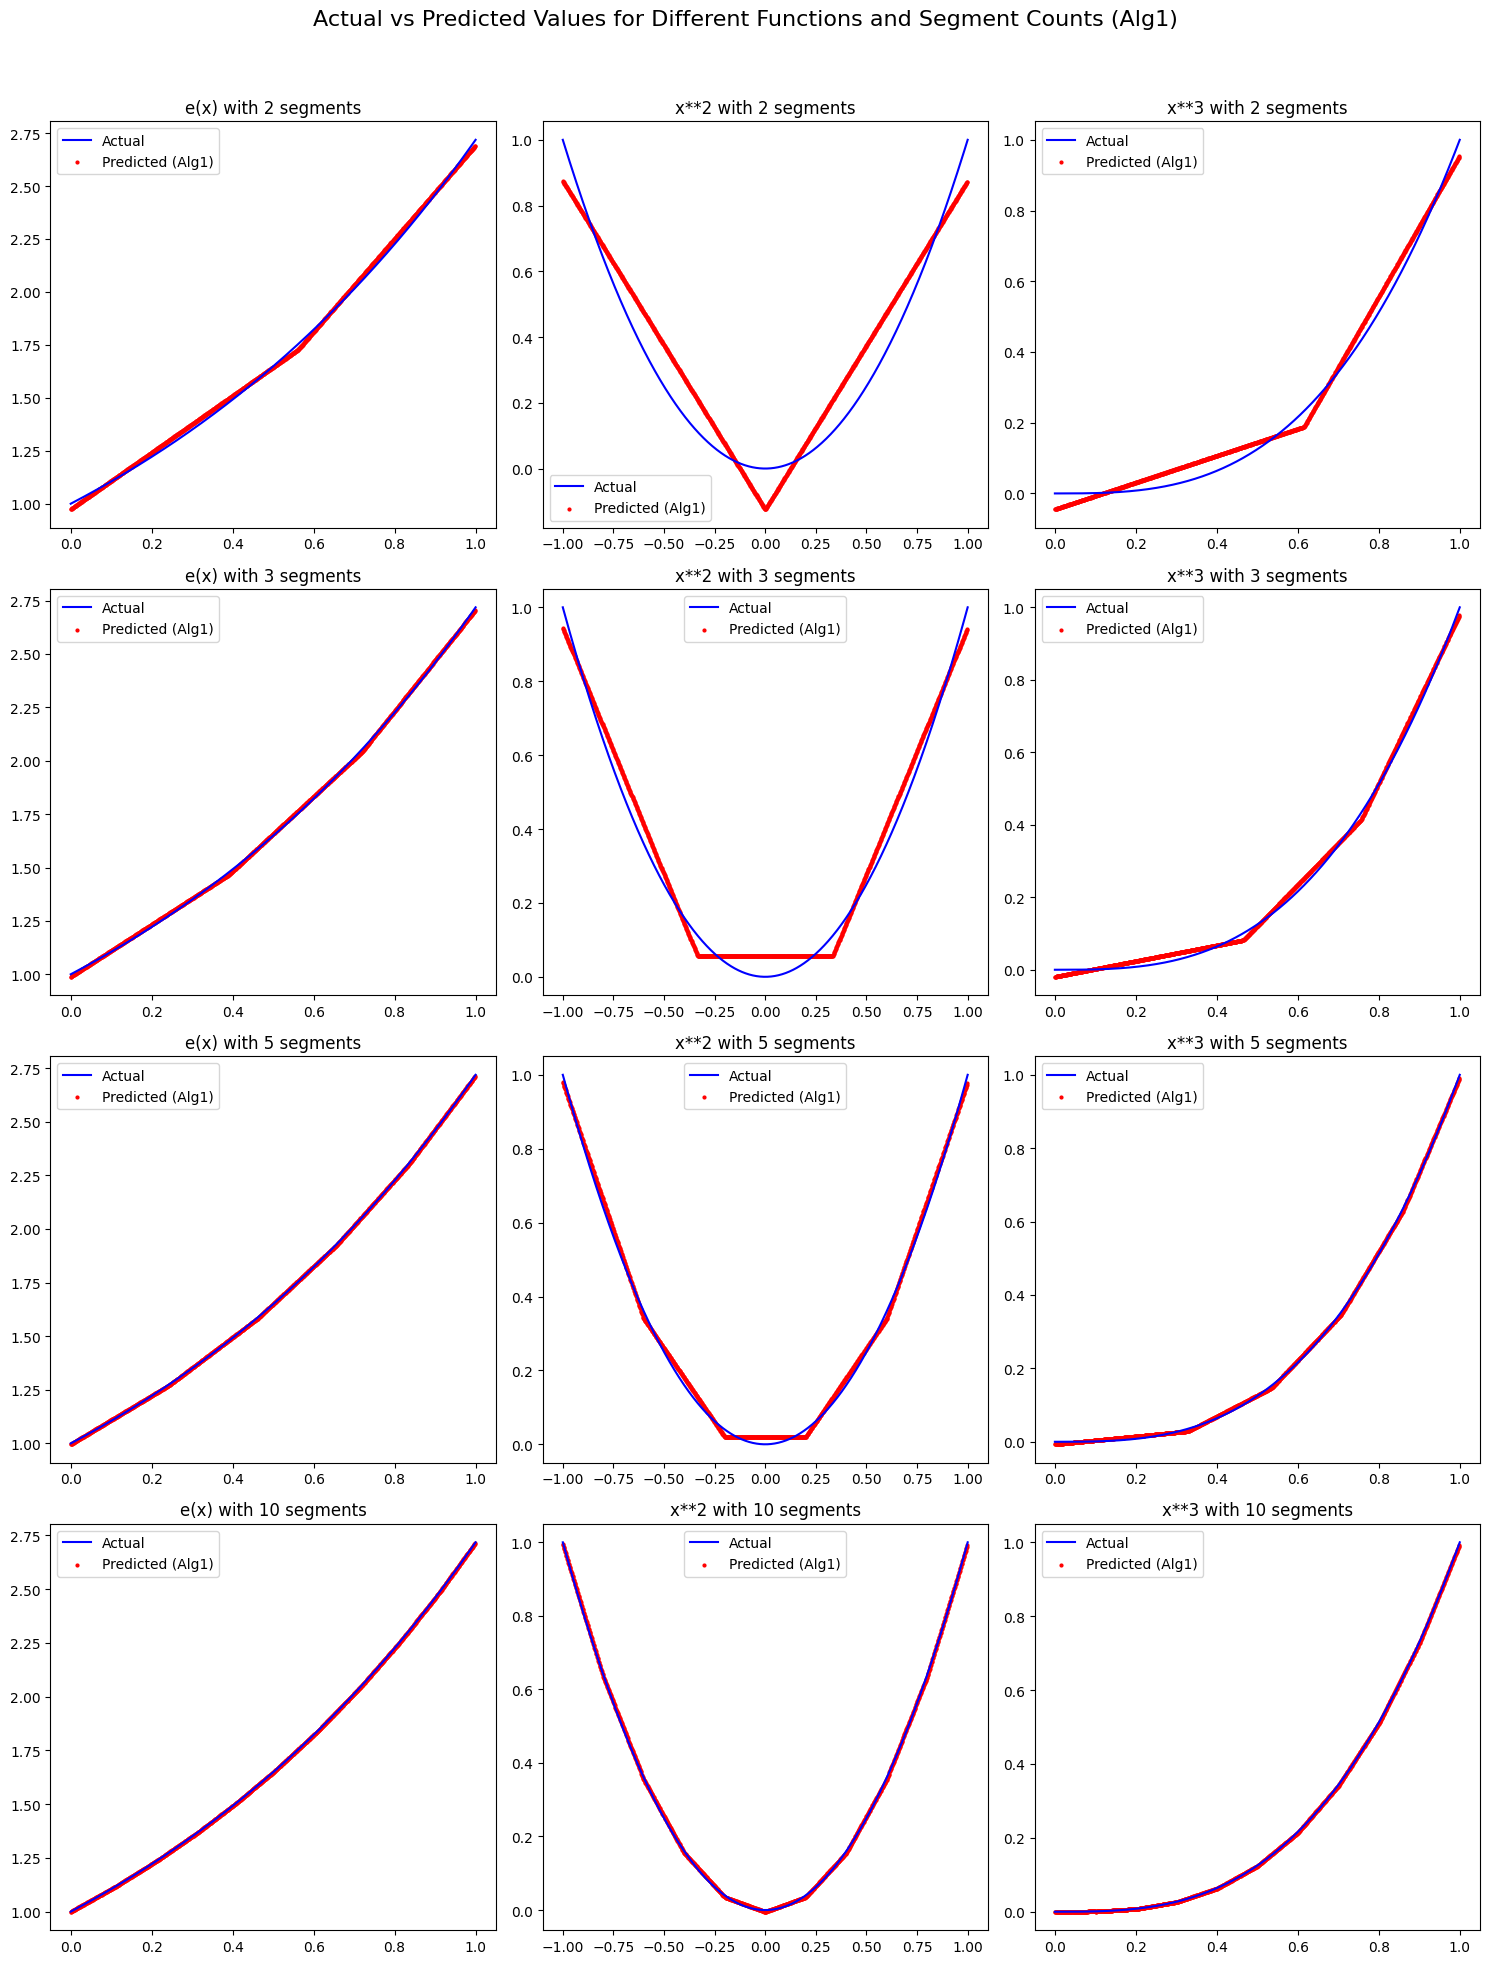

In [41]:
fig_alg1, axs_alg1 = plt.subplots(len(n_segments), len(functions), figsize=(15, 20))
fig_alg1.suptitle('Actual vs Predicted Values for Different Functions and Segment Counts (Alg1)', fontsize=16)

for i, result in enumerate(predictions_alg1):
    fn_idx = list(functions.keys()).index(result["Function"])
    seg_idx = n_segments.index(result["n"])

    ax = axs_alg1[seg_idx, fn_idx]

    # Plot actual values
    ax.plot(result["Domain"], result["Actual"], label="Actual", color="blue")

    # Plot predicted values by Alg1
    ax.scatter(result["Domain"], result["Predicted_alg1"], label="Predicted (Alg1)", color="red", s=4)

    ax.set_title(f"{result['Function']} with {result['n']} segments")
    ax.legend()

# Adjust layout and show the plot for Alg1
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the title
plt.show()


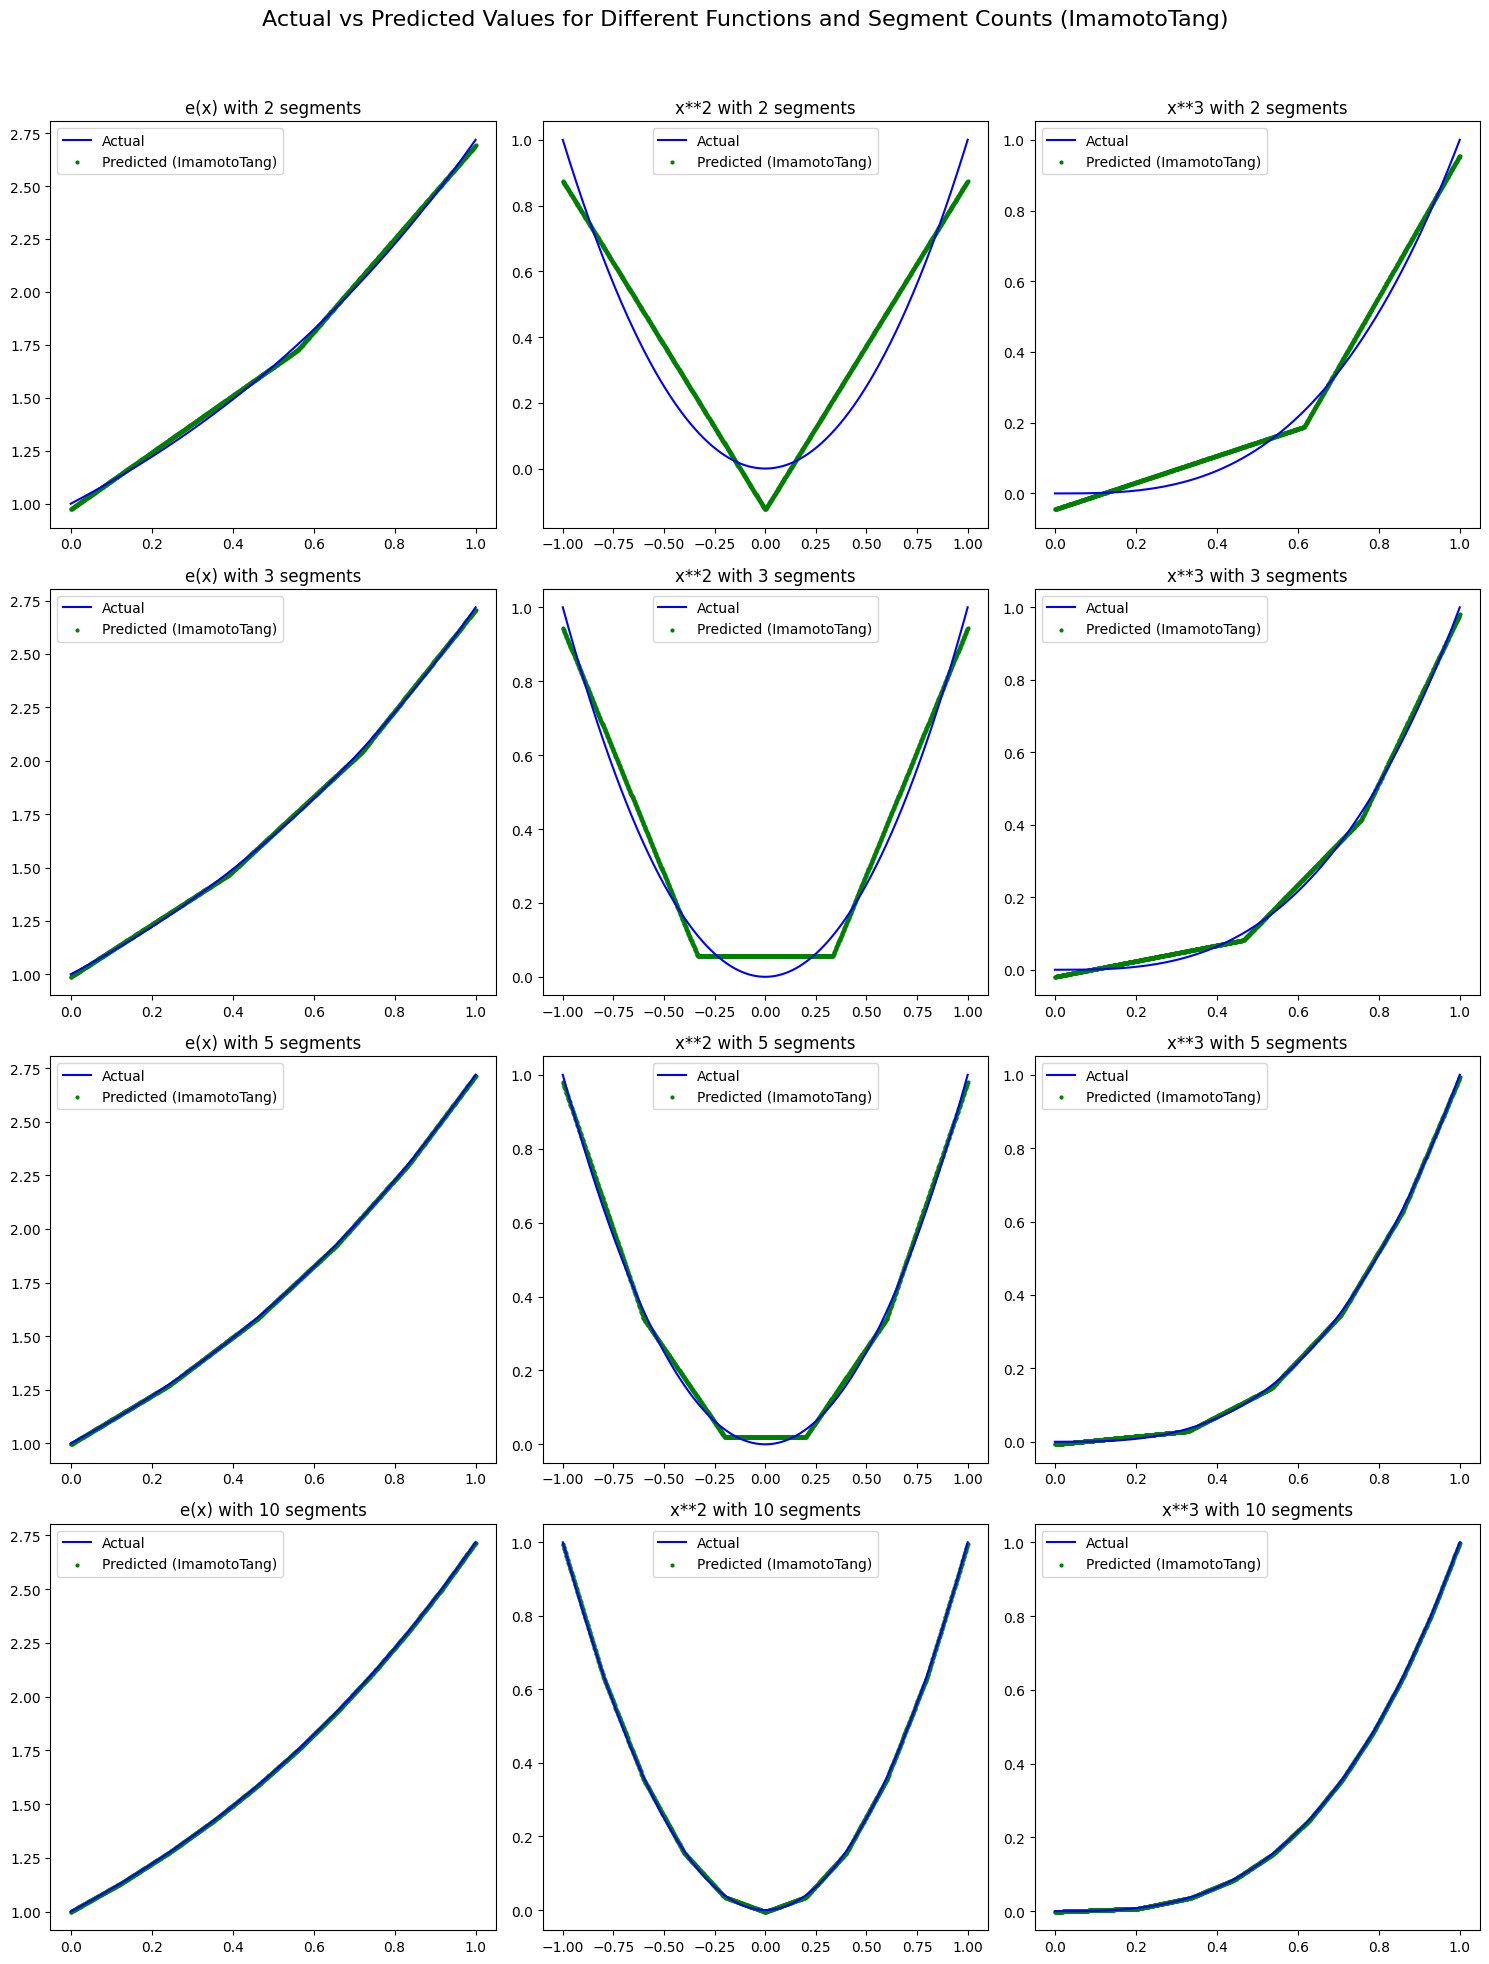

In [42]:
fig_imamototang, axs_imamototang = plt.subplots(len(n_segments), len(functions), figsize=(15, 20))
fig_imamototang.suptitle('Actual vs Predicted Values for Different Functions and Segment Counts (ImamotoTang)', fontsize=16)

for i, result in enumerate(predictions_imamototang):
    fn_idx = list(functions.keys()).index(result["Function"])
    seg_idx = n_segments.index(result["n"])

    ax = axs_imamototang[seg_idx, fn_idx]

    # Plot actual values
    ax.plot(result["Domain"], result["Actual"], label="Actual", color="blue")

    # Plot predicted values by ImamotoTang
    ax.scatter(result["Domain"], result["Predicted_imamototang"], label="Predicted (ImamotoTang)", color="green", s=4)

    ax.set_title(f"{result['Function']} with {result['n']} segments")
    ax.legend()

# Adjust layout and show the plot for ImamotoTang
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the title
plt.show()

In [23]:
import pandas as pd

# function map
functions = {
    "e(x)": {"domain": [0, 1], "f": alg1.exp, "f'": alg1.exp},
    "x**2": {"domain": [-1, 1], "f": alg1.x_sq, "f'": lambda x: 2 * x},
    "x**3": {"domain": [0, 1], "f": alg1.x_cube, "f'": lambda x: 3 * (x**2)},
}

n_segments = [2, 3, 5, 10]
x_sym = sp.Symbol("x")

# Initialize list to store RMSE values
rmse_list = []

# If there's already an existing DataFrame (for example), you could load it or initialize one
# df = pd.DataFrame(existing_data)
# Otherwise, we create an empty DataFrame
df = pd.read_csv("table_1.csv")

# Define RMSE calculation function
def calculate_rmse(approx_values, actual_values):
    mse = np.mean([(approx_val - actual_val)**2 for approx_val, actual_val in zip(approx_values, actual_values)])
    rmse = np.sqrt(mse)
    return rmse

for i, result in enumerate(predictions_imamototang):
    # Compute RMSE between actual and predicted values
    rmse = calculate_rmse(result["Predicted_imamototang"], result["Actual"])
    rmse = round(rmse, 5)
    # Append RMSE to the list
    rmse_list.append(rmse)
    print(rmse_list)
    
    # Optionally add the function, segment, and RMSE to the DataFrame
    
df['ammamoto_rmse'] = rmse_list
df['ammamoto_paper_rmse'] = [0.02330,0.01074, 0.00399, 0.00102, 0.12500, 0.05556, 0.02000, 0.00500, 0.03490, 0.01644, "unconverged", "unconverged"]
df.to_csv("table_1.csv", index=False)


# Now you can view the DataFrame with the immamoto_rmse column
print(df)


[0.018]
[0.018, 0.008]
[0.018, 0.008, 0.00288]
[0.018, 0.008, 0.00288, 0.00072]
[0.018, 0.008, 0.00288, 0.00072, 0.08544]
[0.018, 0.008, 0.00288, 0.00072, 0.08544, 0.03798]
[0.018, 0.008, 0.00288, 0.00072, 0.08544, 0.03798, 0.01367]
[0.018, 0.008, 0.00288, 0.00072, 0.08544, 0.03798, 0.01367, 0.00342]
[0.018, 0.008, 0.00288, 0.00072, 0.08544, 0.03798, 0.01367, 0.00342, 0.0305]
[0.018, 0.008, 0.00288, 0.00072, 0.08544, 0.03798, 0.01367, 0.00342, 0.0305, 0.01325]
[0.018, 0.008, 0.00288, 0.00072, 0.08544, 0.03798, 0.01367, 0.00342, 0.0305, 0.01325, 0.00468]
[0.018, 0.008, 0.00288, 0.00072, 0.08544, 0.03798, 0.01367, 0.00342, 0.0305, 0.01325, 0.00468, 0.00115]
   Function   n  Mean ΔS  Theoretical Upper Bound  Theoretical Lower Bound  \
0      e(x)   2  0.02635                   0.0425                   0.0156   
1      e(x)   3  0.01170                   0.0189                   0.0069   
2      e(x)   5  0.00421                   0.0068                   0.0025   
3      e(x)  10  0.00107